In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Columns description**
* anaemia:Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase:Level of the CPK enzyme in the blood (mcg/L)
* diabetes:If the patient has diabetes (boolean)
* ejection_fraction:Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure:blood hypertension
* platelets:are a component of blood whose function (along with the coagulation factors)
* serum_creatinine:Serum creatinine is widely interpreted as a measure only of renal function
* serum_sodium: to see how much sodium is in your blood it is particularly important for nerve and muscle function.

In [3]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

In [5]:
train = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


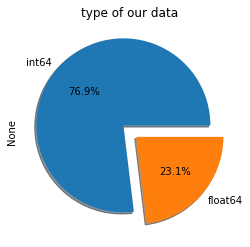

In [7]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');

In [8]:
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
train.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Finding missing values

In [10]:
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# visualization

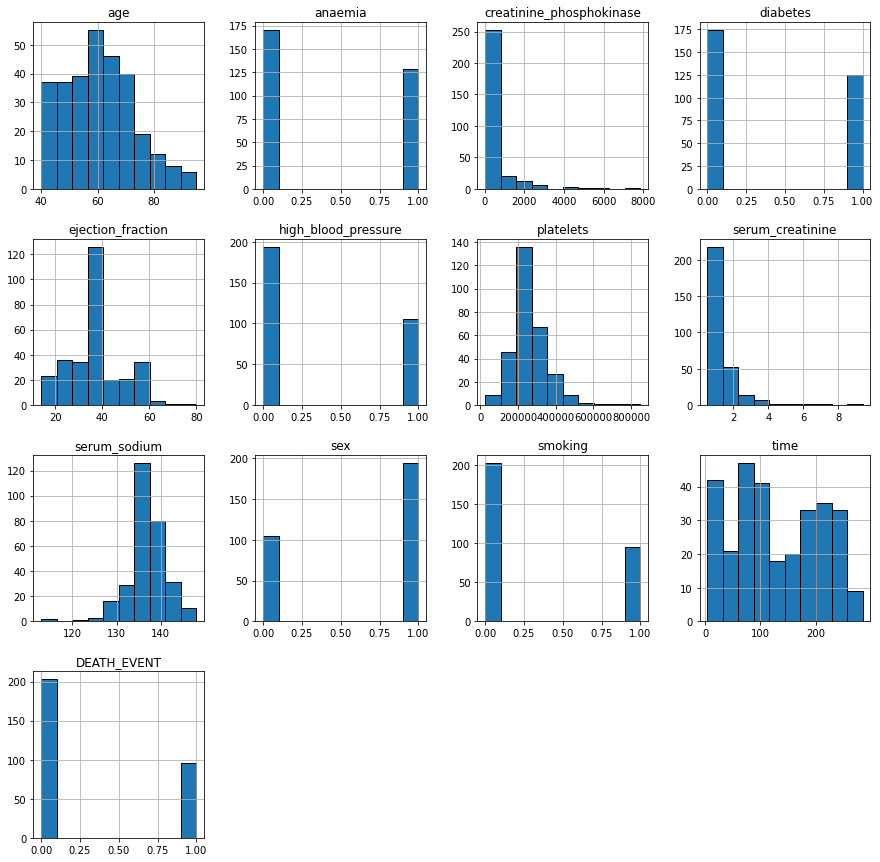

In [11]:
train.hist(figsize=(15,15),edgecolor='black');

# Death Events

Text(0.5, 1.0, 'the % of deaths')

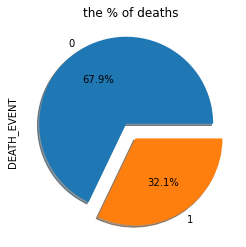

In [12]:
train.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('the % of deaths')

# Age

Text(0.5, 1.0, 'the ages of our persone')

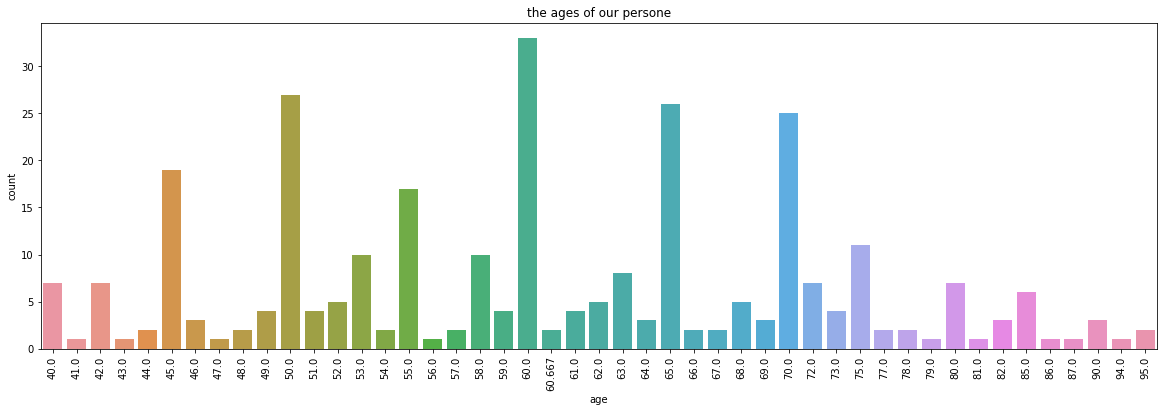

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=train)
plt.xticks(rotation=90)
plt.title('the ages of our persone')

In [14]:
# Distribution of Age
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='Distribution of Age',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'presentation'
)

fig.show()

In [15]:
# Distribution of AGE Vs DEATH_EVENT
fig = px.histogram(train, x="age", color="DEATH_EVENT", marginal="violin", hover_data=train.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly",                   
                  )
fig.show()

# sex

<AxesSubplot:ylabel='sex'>

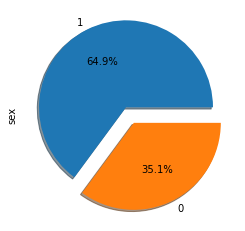

In [16]:
train.sex.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)

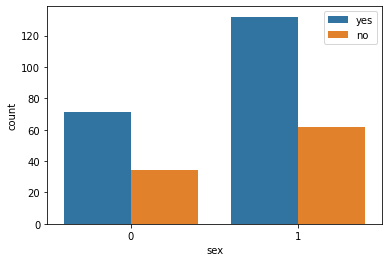

In [17]:
sns.countplot(x='sex',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no'])

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==1)]
d2 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==1)]
d3 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==0)]
d4 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]

values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

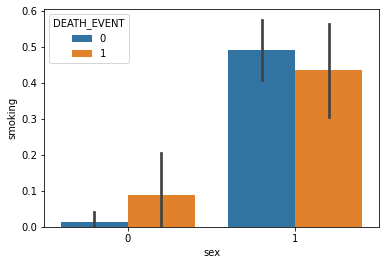

In [19]:
sns.barplot(x='sex',y='smoking',hue='DEATH_EVENT',data=train);

# Diabet

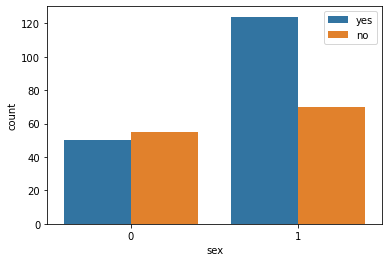

In [20]:
sns.countplot(x='sex',hue='diabetes',data=train)
plt.legend(['yes','no']);

<AxesSubplot:ylabel='diabetes'>

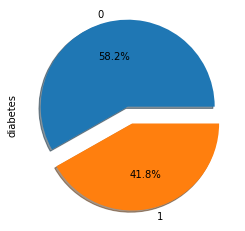

In [22]:
train.diabetes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)

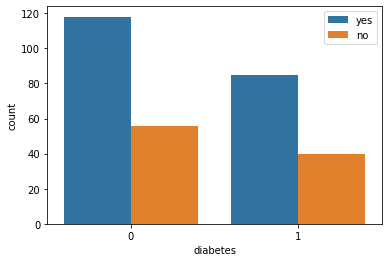

In [23]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no']);

# Ejection_fraction

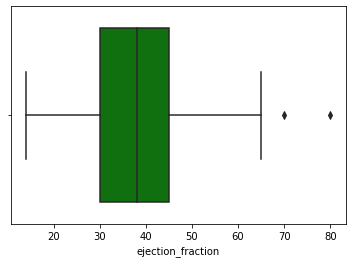

In [24]:
sns.boxplot(x = train.ejection_fraction, color = 'green')
plt.show()

We can see there are two outliers. Lets remove them (70 and 80)

In [25]:
train[train['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [26]:
train = train[train['ejection_fraction']<70]

In [27]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates

    template = 'plotly_dark'
)

fig.show()

**Time**
* features selection

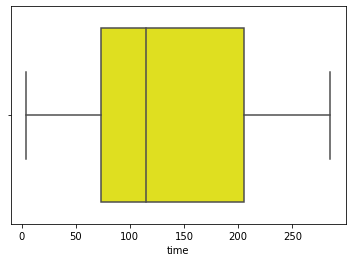

In [28]:
sns.boxplot(x=train.time, color = 'yellow')
plt.show()

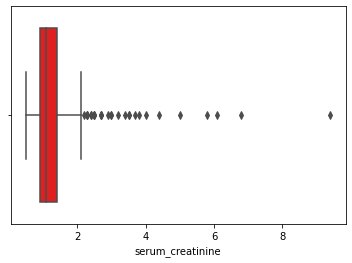

In [29]:
sns.boxplot(x=train.serum_creatinine, color = 'red')
plt.show()

# Feature selection

In [31]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.0,0.1,-0.1,-0.1,0.1,0.1,-0.1,0.2,-0.0,0.1,0.0,-0.2,0.3
anaemia,0.1,1.0,-0.2,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.1,-0.1,-0.1,0.1
creatinine_phosphokinase,-0.1,-0.2,1.0,-0.0,-0.0,-0.1,0.0,-0.0,0.1,0.1,0.0,-0.0,0.1
diabetes,-0.1,-0.0,-0.0,1.0,0.0,-0.0,0.1,-0.0,-0.1,-0.2,-0.2,0.0,0.0
ejection_fraction,0.1,0.0,-0.0,0.0,1.0,0.0,0.1,-0.1,0.2,-0.1,-0.1,0.0,-0.3
high_blood_pressure,0.1,0.0,-0.1,-0.0,0.0,1.0,0.1,-0.0,0.0,-0.1,-0.1,-0.2,0.1
platelets,-0.1,-0.0,0.0,0.1,0.1,0.1,1.0,-0.0,0.1,-0.1,0.0,0.0,-0.0
serum_creatinine,0.2,0.0,-0.0,-0.0,-0.1,-0.0,-0.0,1.0,-0.2,0.0,-0.0,-0.2,0.3
serum_sodium,-0.0,0.0,0.1,-0.1,0.2,0.0,0.1,-0.2,1.0,-0.0,0.0,0.1,-0.2
sex,0.1,-0.1,0.1,-0.2,-0.1,-0.1,-0.1,0.0,-0.0,1.0,0.4,-0.0,-0.0


[0.09684011 0.02786396 0.07698979 0.02850287 0.13091807 0.02622238
 0.07021462 0.11668291 0.08051442 0.02825287 0.02805527 0.28894271]


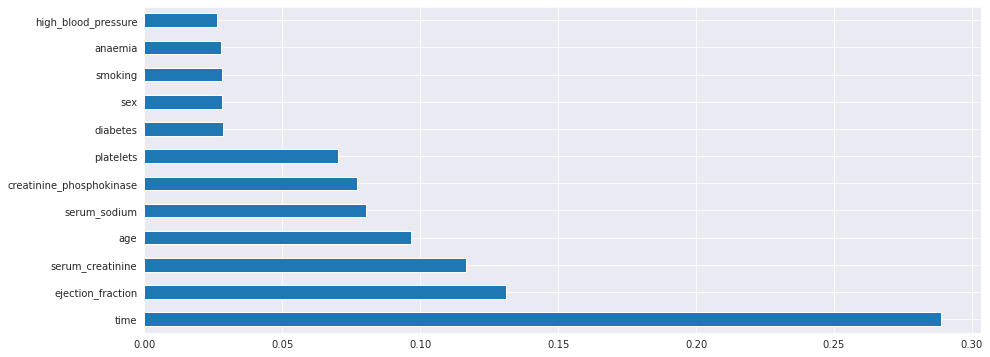

In [32]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = train.iloc[:, :-1]
y = train.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

like we can c that some of our feature had a corrolation almost aqual to 0 so we gonna drop them like :
* anaemia
* creatinine_phosphokinase
* diabetes
* high_blood_pressure
* platelets
* sex
* smoking

We will select only 3 features : time, ejection_fraction, serum_creatinine

In [33]:
train=train.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)

In [34]:
train

,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,20,1.9,130,4,1
1,38,1.1,136,6,1
2,20,1.3,129,7,1
3,20,1.9,137,7,1
4,20,2.7,116,8,1
...,...,...,...,...,...
294,38,1.1,143,270,0
295,38,1.2,139,271,0
296,60,0.8,138,278,0
297,38,1.4,140,280,0


In [35]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
ejection_fraction,1.000,-0.087,0.180,0.046,-0.285
serum_creatinine,-0.087,1.000,-0.211,-0.189,0.286
serum_sodium,0.180,-0.211,1.000,0.088,-0.196
time,0.046,-0.189,0.088,1.000,-0.537
DEATH_EVENT,-0.285,0.286,-0.196,-0.537,1.000


# split data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [38]:
x=train.drop('DEATH_EVENT',axis=1)
y=train.DEATH_EVENT

In [39]:
print(x.shape)
print(y.shape)

(297, 4)
(297,)


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [41]:
print(x_train)
print(y_test)

     ejection_fraction  serum_creatinine  serum_sodium  time
222                 35              1.10           139   201
74                  20              1.20           134    73
9                   35              9.40           133    10
69                  25              1.83           135    67
43                  50              1.00           134    33
..                 ...               ...           ...   ...
196                 38              1.18           137   185
218                 35              1.10           134   197
35                  35              3.50           134    30
157                 25              1.00           136   120
137                 25              2.10           130   108

[207 rows x 4 columns]
80     0
246    1
77     0
177    0
70     0
      ..
93     1
165    1
280    0
184    1
277    0
Name: DEATH_EVENT, Length: 90, dtype: int64


# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [43]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg)

[[57  9]
 [ 3 21]]
0.8666666666666667


# KNN

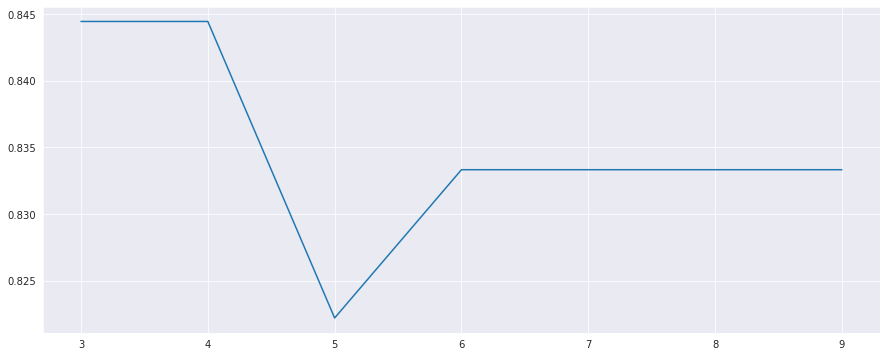

In [49]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [50]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0]


In [52]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[55 11]
 [ 5 19]]
0.8222222222222222


# RANDOM FOREST CLASSIFCATION

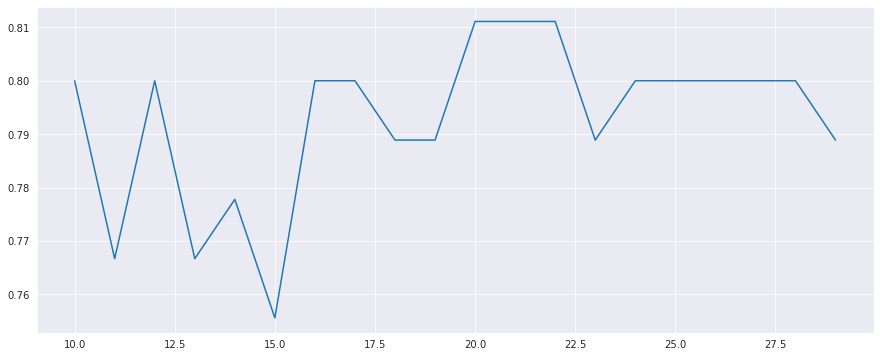

In [53]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [54]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [55]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0]


In [56]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[49 17]
 [ 5 19]]
0.7555555555555555


# DecisionTreeClassifier

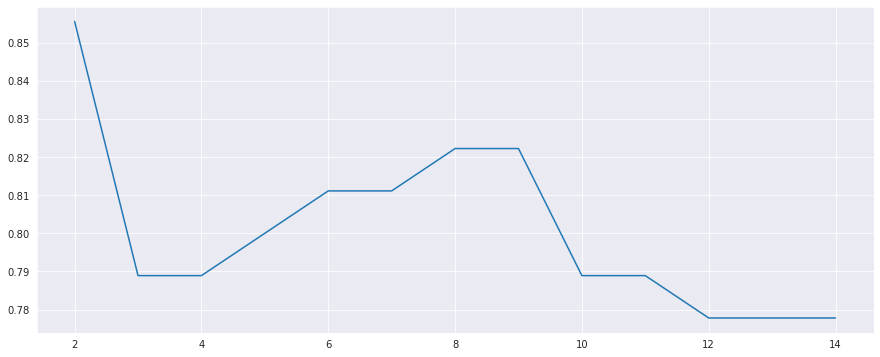

In [58]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [59]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [60]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0]


In [61]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

[[51 15]
 [ 4 20]]
0.7888888888888889


In [62]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest',   
              'Decision Tree'],
    'Score': [acc_knn, acc_logreg, 
              acc_randomforest,acc_decisiontree
              ]})
models.sort_values(by='Score', ascending=False)

NameError: name 'acc_svc' is not defined

In [57]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

NameError: name 'models' is not defined